In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\JoCraft\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
GaussianMix = GaussianMixture.symmetric_2D(5,std = 0.5)

gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64], conditional=True)

trainer = DiffusionGuidanceTrainer(path=gaussian_path, model=model1, p_uncond=0.1)

trainer.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 2000)

In Epoch 0 we have a loss of 10.187186241149902
In Epoch 1000 we have a loss of 7.233260631561279
In Epoch 2000 we have a loss of 7.015079021453857
In Epoch 3000 we have a loss of 5.906845569610596
In Epoch 4000 we have a loss of 11.535470962524414
In Epoch 5000 we have a loss of 9.346752166748047
In Epoch 6000 we have a loss of 5.209542274475098
In Epoch 7000 we have a loss of 8.413921356201172
In Epoch 8000 we have a loss of 10.699118614196777
In Epoch 9000 we have a loss of 5.169448375701904
In Epoch 10000 we have a loss of 6.3229451179504395
In Epoch 11000 we have a loss of 6.8034491539001465
In Epoch 12000 we have a loss of 25.21251106262207
In Epoch 13000 we have a loss of 7.682479381561279
In Epoch 14000 we have a loss of 4.389325141906738
In Epoch 15000 we have a loss of 8.490471839904785
In Epoch 16000 we have a loss of 5.842610836029053
In Epoch 17000 we have a loss of 5.596803665161133
In Epoch 18000 we have a loss of 8.332958221435547
In Epoch 19000 we have a loss of 15.813

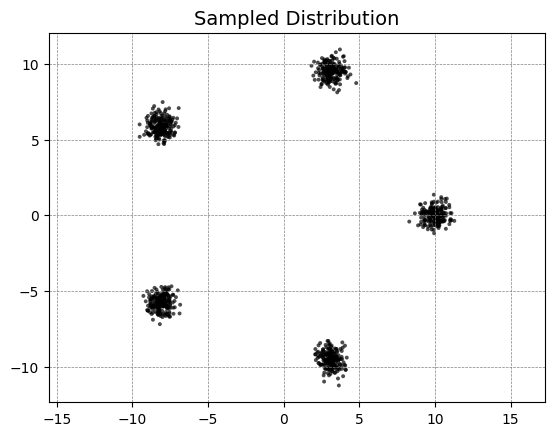

In [3]:
sampels = GaussianMix.sample(1000)
plot_samples(sampels)

In [14]:
sde = ProductGuidanceLangevin([model1,model1], alpha=LinearAlpha(), beta=SquareRootBeta(), sigma=1,guidance_scales=[0.2, 0.9])
solver = EulerSDESolver(sde)
sampler = Sampler(solver)

steps = torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device)
gaussian_samples = gaussian_path.p_init.sample(2000)

conditions = [torch.Tensor([10.0,0.0]).expand(gaussian_samples.shape[0], -1).to(device), torch.Tensor([3.0,-10.0]).expand(gaussian_samples.shape[0], -1).to(device)]
final_samples = sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps, y = conditions)

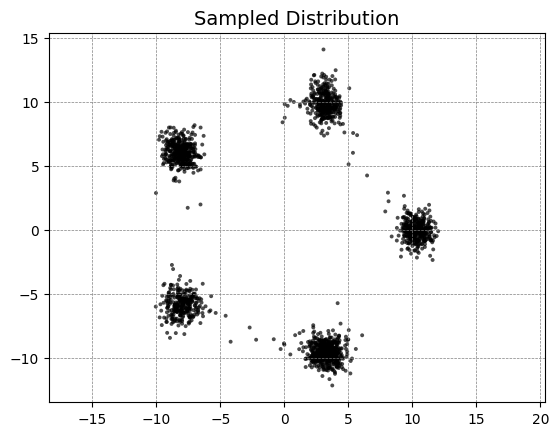

In [15]:
plot_samples(final_samples)
plt.show()